C:\Users\Rubens\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



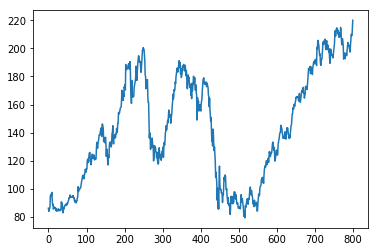

In [1]:
#%reset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
np.random.seed(42)
dataframe = pd.read_csv('Apple_Data_300.csv').iloc[0:800,:]
dataframe.head()

plt.plot(range(0,dataframe.shape[0]),dataframe.iloc[:,1])
plt.show()

In [2]:
x1=np.array(dataframe.iloc[:,1]+np.random.randn(dataframe.shape[0])).astype(np.float32).reshape(-1,1)

y=np.array(dataframe.iloc[:,1]).T.astype(np.float32).reshape(-1,1)

tfd = tfp.distributions

init = tf.global_variables_initializer()

In [3]:
with tf.Session() as sess:
    sess.run(init)

    model = tf.keras.Sequential([
      tf.keras.layers.Dense(1,kernel_initializer='glorot_uniform'),
      tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1))
    ])
    negloglik = lambda x, rv_x: -rv_x.log_prob(x)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=negloglik)
    
    model.fit(x1,y, epochs=500, verbose=True, batch_size=16)
    
    yhat = model(np.array(dataframe.iloc[:,1]).T.astype(np.float32).reshape(-1,1)[650:800])
    mean0 = tf.convert_to_tensor(yhat)
    mean = sess.run(mean0)    
    stddev = yhat.stddev()
    mean_plus_2_std = sess.run(mean - 3. * stddev)
    mean_minus_2_std = sess.run(mean + 3. * stddev)


Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/500
800/800 [==============================] - 0s 446us/sample - loss: 35128.7969
Epoch 2/500
800/800 [==============================] - 0s 50us/sample - loss: 34931.7857
Epoch 3/500
800/800 [==============================] - 0s 51us/sample - loss: 34736.9463
Epoch 4/500
800/800 [==============================] - 0s 47us/sample - loss: 34543.1729
Epoch 5/500
800/800 [==============================] - 0s 50us/sample - loss: 34349.8201
Epoch 6/500
800/800 [==============================] - 0s 51us/sample - loss: 34157.5583
Epoch 7/500
800/800 [==============================] - 0s 57us/sample - loss: 33966.0495
Epoch 8/500
800/800 [==============================] - 0s 56us/sample - loss: 33774.5688
Epoch 9/500
800/800 [==============================] - 0s 51us/sample - loss: 33585.3848
Epoch 10/500
800/800 [==============================] - 0s 51us/sample - loss: 33395.0157
Epoch 11/500
800/800 [==============

800/800 [==============================] - 0s 55us/sample - loss: 20653.4128
Epoch 89/500
800/800 [==============================] - 0s 52us/sample - loss: 20512.1896
Epoch 90/500
800/800 [==============================] - 0s 44us/sample - loss: 20372.7217
Epoch 91/500
800/800 [==============================] - 0s 42us/sample - loss: 20232.8100
Epoch 92/500
800/800 [==============================] - 0s 45us/sample - loss: 20093.6196
Epoch 93/500
800/800 [==============================] - 0s 46us/sample - loss: 19955.2597
Epoch 94/500
800/800 [==============================] - 0s 45us/sample - loss: 19817.4415
Epoch 95/500
800/800 [==============================] - 0s 45us/sample - loss: 19679.8032
Epoch 96/500
800/800 [==============================] - 0s 46us/sample - loss: 19542.9349
Epoch 97/500
800/800 [==============================] - 0s 51us/sample - loss: 19406.5890
Epoch 98/500
800/800 [==============================] - 0s 45us/sample - loss: 19270.3666
Epoch 99/500
800/800 [=

800/800 [==============================] - 0s 47us/sample - loss: 10045.8533
Epoch 179/500
800/800 [==============================] - 0s 50us/sample - loss: 9950.5645
Epoch 180/500
800/800 [==============================] - 0s 44us/sample - loss: 9855.9885
Epoch 181/500
800/800 [==============================] - 0s 44us/sample - loss: 9761.9313
Epoch 182/500
800/800 [==============================] - 0s 46us/sample - loss: 9668.3510
Epoch 183/500
800/800 [==============================] - 0s 45us/sample - loss: 9575.1937
Epoch 184/500
800/800 [==============================] - 0s 45us/sample - loss: 9482.7284
Epoch 185/500
800/800 [==============================] - 0s 45us/sample - loss: 9390.4761
Epoch 186/500
800/800 [==============================] - 0s 49us/sample - loss: 9298.6249
Epoch 187/500
800/800 [==============================] - 0s 45us/sample - loss: 9207.9667
Epoch 188/500
800/800 [==============================] - 0s 45us/sample - loss: 9117.1502
Epoch 189/500
800/800 [

800/800 [==============================] - 0s 45us/sample - loss: 3367.1245
Epoch 270/500
800/800 [==============================] - 0s 45us/sample - loss: 3315.5936
Epoch 271/500
800/800 [==============================] - 0s 46us/sample - loss: 3264.2052
Epoch 272/500
800/800 [==============================] - 0s 45us/sample - loss: 3213.3618
Epoch 273/500
800/800 [==============================] - 0s 45us/sample - loss: 3162.8430
Epoch 274/500
800/800 [==============================] - 0s 44us/sample - loss: 3113.0389
Epoch 275/500
800/800 [==============================] - 0s 46us/sample - loss: 3063.4770
Epoch 276/500
800/800 [==============================] - 0s 61us/sample - loss: 3014.3450
Epoch 277/500
800/800 [==============================] - 0s 79us/sample - loss: 2965.7861
Epoch 278/500
800/800 [==============================] - 0s 66us/sample - loss: 2917.6929
Epoch 279/500
800/800 [==============================] - 0s 47us/sample - loss: 2870.0152
Epoch 280/500
800/800 [=

800/800 [==============================] - 0s 46us/sample - loss: 411.2016
Epoch 361/500
800/800 [==============================] - 0s 46us/sample - loss: 396.6365
Epoch 362/500
800/800 [==============================] - 0s 47us/sample - loss: 382.4302
Epoch 363/500
800/800 [==============================] - 0s 45us/sample - loss: 368.5689
Epoch 364/500
800/800 [==============================] - 0s 44us/sample - loss: 355.0169
Epoch 365/500
800/800 [==============================] - 0s 45us/sample - loss: 341.8074
Epoch 366/500
800/800 [==============================] - 0s 46us/sample - loss: 328.8938
Epoch 367/500
800/800 [==============================] - 0s 46us/sample - loss: 316.2884
Epoch 368/500
800/800 [==============================] - 0s 45us/sample - loss: 304.0992
Epoch 369/500
800/800 [==============================] - 0s 45us/sample - loss: 292.0658
Epoch 370/500
800/800 [==============================] - 0s 46us/sample - loss: 280.4963
Epoch 371/500
800/800 [============

800/800 [==============================] - 0s 46us/sample - loss: 1.5349
Epoch 454/500
800/800 [==============================] - 0s 47us/sample - loss: 1.5226
Epoch 455/500
800/800 [==============================] - 0s 46us/sample - loss: 1.5122
Epoch 456/500
800/800 [==============================] - 0s 51us/sample - loss: 1.5041
Epoch 457/500
800/800 [==============================] - 0s 44us/sample - loss: 1.4976
Epoch 458/500
800/800 [==============================] - 0s 45us/sample - loss: 1.4925
Epoch 459/500
800/800 [==============================] - 0s 44us/sample - loss: 1.4883
Epoch 460/500
800/800 [==============================] - 0s 45us/sample - loss: 1.4852
Epoch 461/500
800/800 [==============================] - 0s 45us/sample - loss: 1.4826
Epoch 462/500
800/800 [==============================] - 0s 45us/sample - loss: 1.4808
Epoch 463/500
800/800 [==============================] - 0s 45us/sample - loss: 1.4792
Epoch 464/500
800/800 [==============================] - 

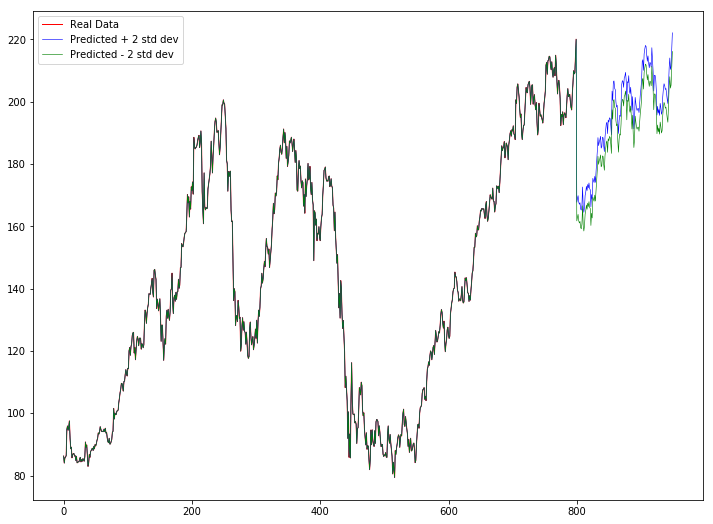

In [4]:
plt.figure(figsize=(12,9))
plt.plot(y,color='red',linewidth=1,label='Real Data')
#plt.plot(mm,color='green',linewidth=1,label='Real Data')
plt.plot(np.concatenate([y,mean_minus_2_std],axis=0),color='blue',linewidth=0.6,label='Predicted + 2 std dev')
plt.plot(np.concatenate([y,mean_plus_2_std],axis=0),color='green',linewidth=0.6,label='Predicted - 2 std dev')
plt.legend()
plt.show()


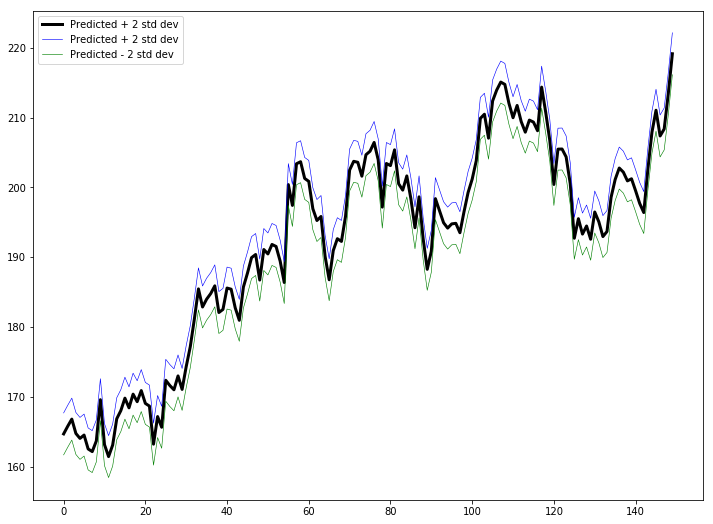

In [5]:
plt.figure(figsize=(12,9))
plt.plot(mean,color='black',linewidth=3,label='Predicted + 2 std dev')
plt.plot(mean_minus_2_std,color='blue',linewidth=0.6,label='Predicted + 2 std dev')
plt.plot(mean_plus_2_std,color='green',linewidth=0.6,label='Predicted - 2 std dev')
plt.legend()
plt.show()
